# Applying Chords to 2D and 3D Images


## Importing packages

In [2]:
import time
import porespy as ps
ps.visualization.set_mpl_style()

Import the usual packages from the Scipy ecosystem:

In [3]:
import scipy as sp
import scipy.ndimage as spim
import matplotlib.pyplot as plt

## Demonstration on 2D Image
Start by creating an image using the ``blobs`` function in ``generators``.  The useful thing about this function is that images can be created with anisotropy.  These are exactly the sort of images where chord length distributions are useful, since chords can be drawn in different directions, to probe the anisotropic pore sizes.

In [4]:
im = ps.generators.blobs(shape=[400, 400], blobiness=[2, 1])

The image can be visualized easily using matplotlib's ``imshow`` function:

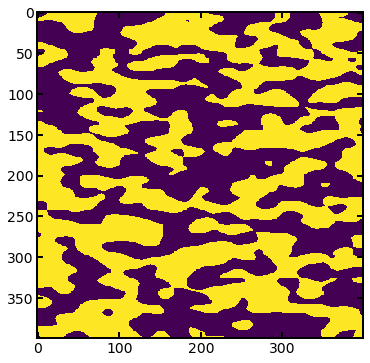

In [5]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=[6, 6])
fig = plt.imshow(im)

Determining chord-length distributions requires first adding chords to the image, which is done using the ``apply_chords`` function.  The following code applies chords to the image in the x-direction (along ``axis=0``), then applies them in the y-direction (``axis=1``).  The two images are then plotted using ``matplotlib``.  

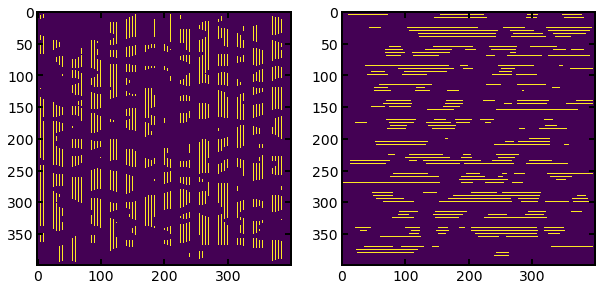

In [6]:
# NBVAL_IGNORE_OUTPUT
crds_x = ps.filters.apply_chords(im=im, spacing=4, axis=0)
crds_y = ps.filters.apply_chords(im=im, spacing=4, axis=1)
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
ax[0].imshow(crds_x)
ax[1].imshow(crds_y)

Note that none of the chords touch the edge of the image.  These chords are trimmed by default since they are artificially shorter than they should be and would skew the results.  This behavior is optional and these chords can be kept by setting ``trim_edges=False``.

It is sometimes useful to colorize the chords by their length.  PoreSpy includes a function called ``region_size`` which counts the number of voxels in each connected region of an image, and replaces those voxels with the numerical value of the region size.  This is illustrated below:

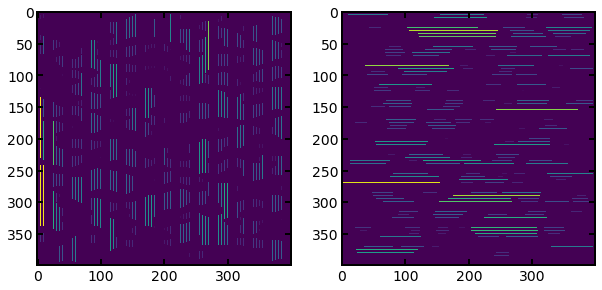

In [7]:
# NBVAL_IGNORE_OUTPUT
sz_x = ps.filters.region_size(crds_x)
sz_y = ps.filters.region_size(crds_y)
fig, ax = plt.subplots(1, 2, figsize=[10, 6])
ax[0].imshow(sz_x)
ax[1].imshow(sz_y)

Although the above images are useful for quick visualization, they are not quantitative.  To get quantitative chord length distributions, pass the chord image(s) to the ``chord_length_distribution`` functions in the ``metrics`` submodule:

In [8]:
data_x = ps.metrics.chord_length_distribution(crds_x, bins=25)
data_y = ps.metrics.chord_length_distribution(crds_y, bins=25)

This function, like many of the functions in the ``metrics`` module, returns a named tuple containing various arrays.  The advantage of the named tuple is that each array can be accessed by name as attributes, such as ``data_x.pdf``.  To see all the available attributes (i.e. arrays) use the autocomplete function if your IDE, the following:

In [9]:
print(data_x._fields)

('L', 'pdf', 'cdf', 'relfreq', 'bin_centers', 'bin_edges', 'bin_widths')


Now we can print the results of the chord-length distribution as bar graphs:

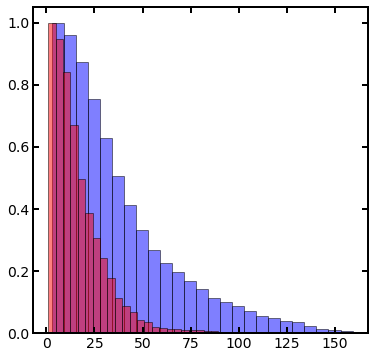

In [10]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=[6, 6])
bar = plt.bar(x=data_y.L, height=data_y.cdf, width=data_y.bin_widths, color='b', edgecolor='k', alpha=0.5)
bar = plt.bar(x=data_x.L, height=data_x.cdf, width=data_x.bin_widths, color='r', edgecolor='k', alpha=0.5)

The key point to see here is that the blue bars are for the y-direction, which was the elongated direction, and as expected they show a tendency toward longer chords.  

## Application to 3D images

Chords can just as easily be applied to 3D images.  Let's create an artificial image of fibers, aligned in the YZ plane, but oriented randomly in the X direction

0it [00:00, ?it/s]

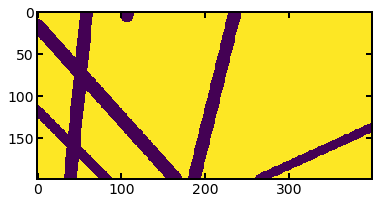

In [11]:
# NBVAL_IGNORE_OUTPUT
im = ps.generators.cylinders(shape=[200, 400, 400], radius=8, ncylinders=200, )
plt.imshow(im[:, :, 100])

As above, we must apply chords to the image then pass the chord image to the ``chord_length_distribution`` function:

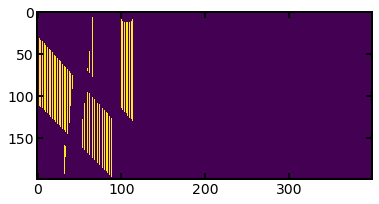

In [12]:
# NBVAL_IGNORE_OUTPUT
crds = ps.filters.apply_chords(im=im, axis=0)
plt.imshow(crds[:, :, 100])